In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format',lambda x:'%.2f' %x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
df=pd.read_csv('/content/advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [6]:
df.shape

(200, 4)

In [7]:
X=df[['TV']]
y=df[['sales']]

In [8]:
reg_model=LinearRegression().fit(X,y)

In [9]:
# y_hat = b + w*x


# sabit (b - bias)
reg_model.intercept_[0]

np.float64(7.032593549127695)

In [10]:
# tv'nin katsayısı(w1)
reg_model.coef_[0][0]

np.float64(0.04753664043301975)

In [13]:
# tahmin

# 120 birimlik TV harcaması olsa ne kadar satış olması beklenir?
reg_model.intercept_[0] + reg_model.coef_[0][0]*120

np.float64(12.736990401090065)

In [16]:
# 500 birimlik TV harcaması olsa ne kadar satış olması beklenir?
reg_model.intercept_[0] + reg_model.coef_[0][0]*500

np.float64(30.800913765637567)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


TV nin max değeri 296.40 ama 500 birimlik tahminde bulunduk. Örnek veride gözlenmemiş değer olsa bile öğrendiğimiz modele sorabiliyoruz. Satışlar tahmin edilebilir.

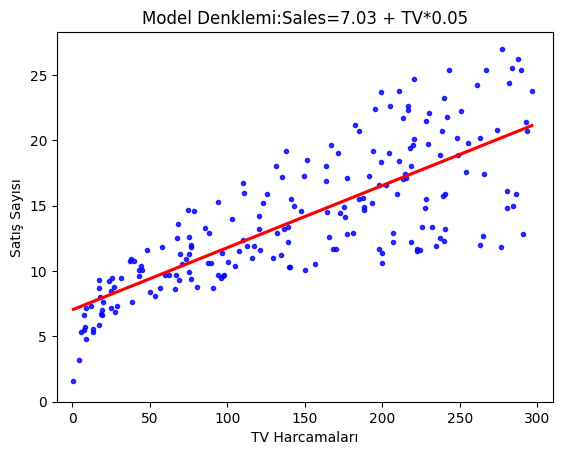

In [18]:
# modelin görselleştirilmesi
g=sns.regplot(x=X, y=y ,scatter_kws={'color':'b','s':9},
              ci=False, color='r')
g.set_title(f'Model Denklemi:Sales={round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

In [22]:
#tahmin başarısı

# MSE - degerin sıfıra yakın olması beklenir
y_pred=reg_model.predict(X)
mean_squared_error(y, y_pred)


10.512652915656757

In [24]:
y.mean()

,0
sales,14.02


In [25]:
y.std()

,0
sales,5.22


In [26]:
# RMSE
np.sqrt(mean_squared_error(y,y_pred))

np.float64(3.2423221486546887)

In [27]:
# MAE
mean_absolute_error(y,y_pred)

2.549806038927486

Metriklerin birbiriyle kıyasına bakılmaz. Modelde değişiklik yapıldıysa 2 MAE ya da 2 RMSE kıyası yapılır.

In [28]:
# R-Kare - bağımsız değişkenlerin bağımlı değişkenleri açıklama yüzdesi
reg_model.score(X,y)

0.611875050850071